In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import numpy as np
import re

In [2]:
# Week 2 Start: Ingestion of the Dataset

# File paths for each year
file_2019 = 'FFRank 2019.csv'
file_2020 = 'FFRank 2020.csv'
file_2021 = 'FFRank 2021.csv'
file_2022 = 'FFRank 2022.csv'

In [3]:
# Read each CSV file into a pandas DataFrame
df_2019 = pd.read_csv(file_2019)
df_2020 = pd.read_csv(file_2020)
df_2021 = pd.read_csv(file_2021)
df_2022 = pd.read_csv(file_2022)

In [4]:
# Display the first few rows of each dataset to ensure they loaded correctly
print("2019 Data Preview:\n", df_2019.head())
print("2020 Data Preview:\n", df_2020.head())
print("2021 Data Preview:\n", df_2021.head())
print("2022 Data Preview:\n", df_2022.head())

2019 Data Preview:
    Rank               Player Team Position  Age  Games Played  \
0     1  Christian McCaffrey  CAR       RB   23            16   
1     2        Lamar Jackson  BAL       QB   22            15   
2     3        Derrick Henry  TEN       RB   25            15   
3     4          Aaron Jones  GNB       RB   25            16   
4     5      Ezekiel Elliott  DAL       RB   24            16   

   Passing Completion  Passing Attempts  Passing Yards   Passing TDs  ...  \
0                   0                 2               0            0  ...   
1                 265               401            3127           36  ...   
2                   0                 0               0            0  ...   
3                   0                 0               0            0  ...   
4                   0                 0               0            0  ...   

   Rushing TDs  Targets  Recepotions  Receiving Yards  Yards per Reception  \
0           15      142          116            

In [5]:
# Check for missing values and data types for each year
print("2019 Data Information:")
print(df_2019.info())
print("\n2020 Data Information:")
print(df_2020.info())
print("\n2021 Data Information:")
print(df_2021.info())
print("\n2022 Data Information:")
print(df_2022.info())

2019 Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Player               200 non-null    object 
 2   Team                 200 non-null    object 
 3   Position             200 non-null    object 
 4   Age                  200 non-null    int64  
 5   Games Played         200 non-null    int64  
 6   Passing Completion   200 non-null    int64  
 7   Passing Attempts     200 non-null    int64  
 8   Passing Yards        200 non-null    int64  
 9   Passing TDs          200 non-null    int64  
 10  Interceptions        200 non-null    int64  
 11  Rushing Attempts     200 non-null    int64  
 12  Rushing Yards        200 non-null    int64  
 13  Yards per Attempt    156 non-null    float64
 14  Rushing TDs          200 non-null    int64  
 15  Targets          

In [6]:
# Basic statistics for numerical columns (mean, min, max, etc.)
print("\n2019 Summary Statistics:")
print(df_2019.describe())
print("\n2020 Summary Statistics:")
print(df_2020.describe())
print("\n2021 Summary Statistics:")
print(df_2021.describe())
print("\n2022 Summary Statistics:")
print(df_2022.describe())


2019 Summary Statistics:
             Rank         Age  Games Played  Passing Completion  \
count  200.000000  200.000000    200.000000          200.000000   
mean   100.500000   26.330000     14.105000           51.680000   
std     57.879185    3.846437      2.460538          115.946174   
min      1.000000   21.000000      3.000000            0.000000   
25%     50.750000   24.000000     13.000000            0.000000   
50%    100.500000   25.500000     15.000000            0.000000   
75%    150.250000   28.000000     16.000000            0.000000   
max    200.000000   42.000000     17.000000          408.000000   

       Passing Attempts  Passing Yards   Passing TDs  Interceptions  \
count        200.000000      200.000000   200.000000     200.000000   
mean          80.795000      592.350000     3.775000       1.755000   
std          181.237935     1334.654668     8.575082       4.454682   
min            0.000000        0.000000     0.000000       0.000000   
25%            

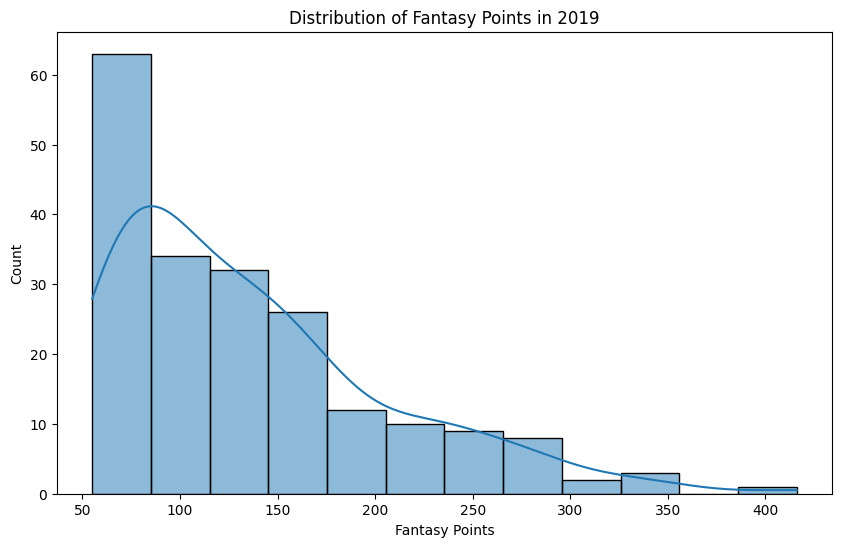

In [7]:
# Plot distribution of fantasy points
plt.figure(figsize=(10, 6))
sns.histplot(df_2019['Fantasy Points'], kde=True)
plt.title('Distribution of Fantasy Points in 2019')
plt.show()

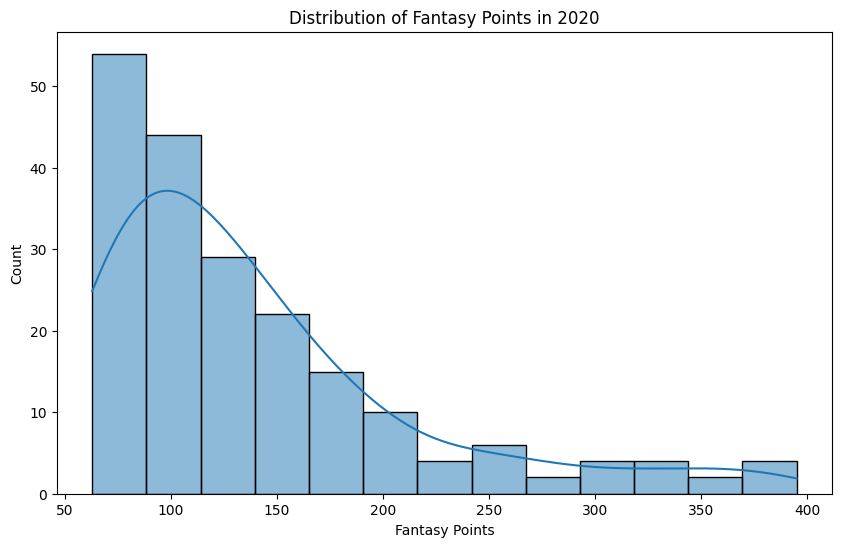

In [8]:
# Plot distribution of fantasy points
plt.figure(figsize=(10, 6))
sns.histplot(df_2020['Fantasy Points'], kde=True)
plt.title('Distribution of Fantasy Points in 2020')
plt.show()

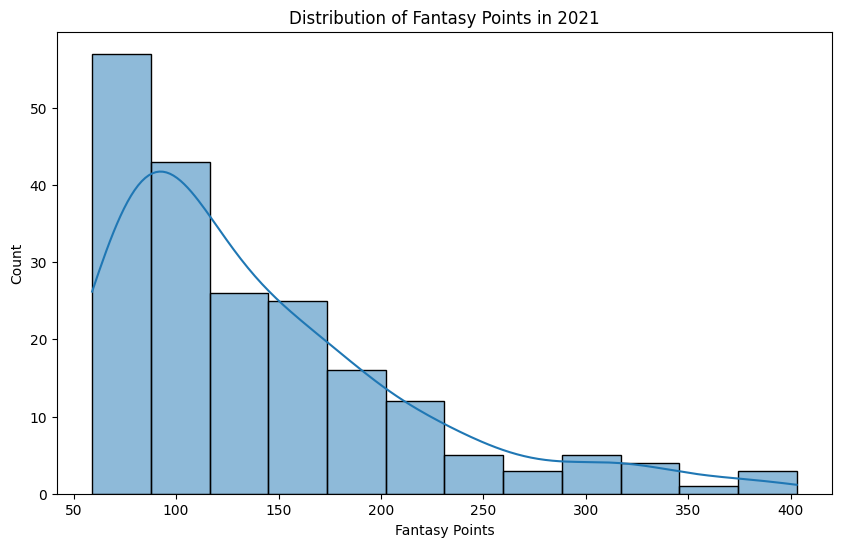

In [9]:
# Plot distribution of fantasy points
plt.figure(figsize=(10, 6))
sns.histplot(df_2021['Fantasy Points'], kde=True)
plt.title('Distribution of Fantasy Points in 2021')
plt.show()

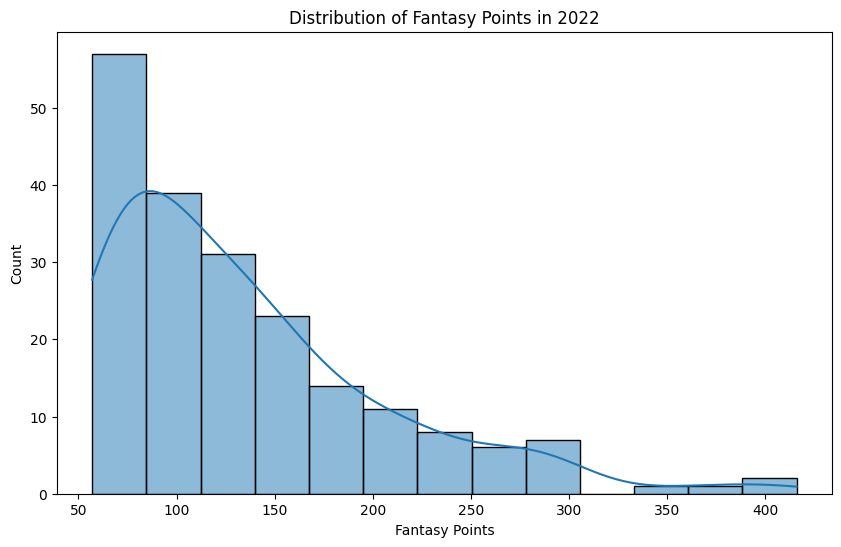

In [10]:
# Plot distribution of fantasy points
plt.figure(figsize=(10, 6))
sns.histplot(df_2022['Fantasy Points'], kde=True)
plt.title('Distribution of Fantasy Points in 2022')
plt.show()

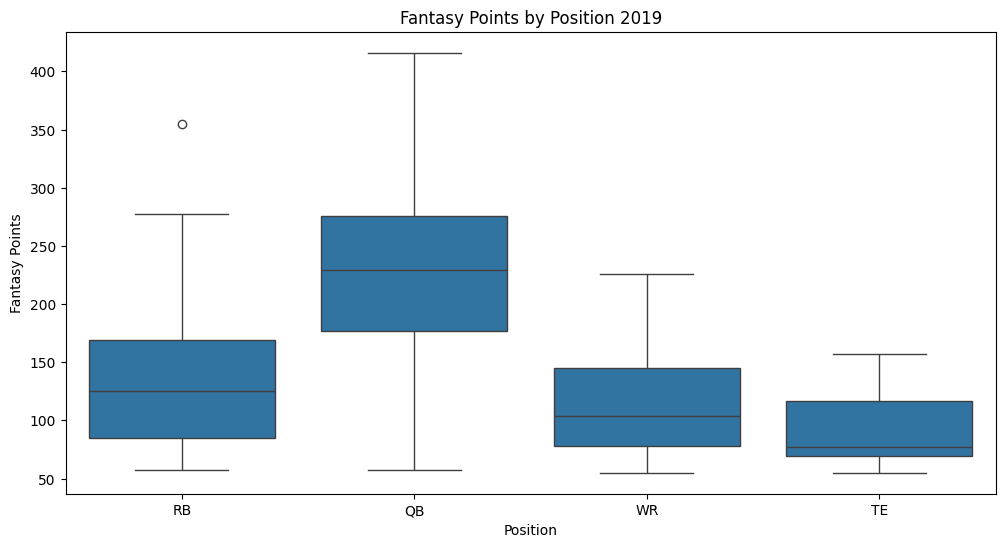

In [11]:
# Boxplot to compare fantasy points across positions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Fantasy Points', data=df_2019)
plt.title('Fantasy Points by Position 2019')
plt.show()

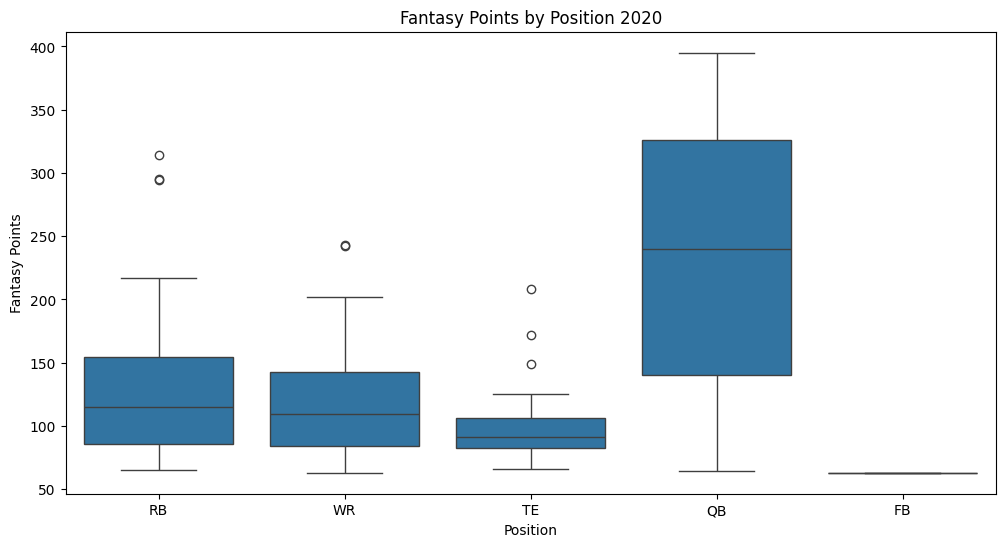

In [12]:
# Boxplot to compare fantasy points across positions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Fantasy Points', data=df_2020)
plt.title('Fantasy Points by Position 2020')
plt.show()

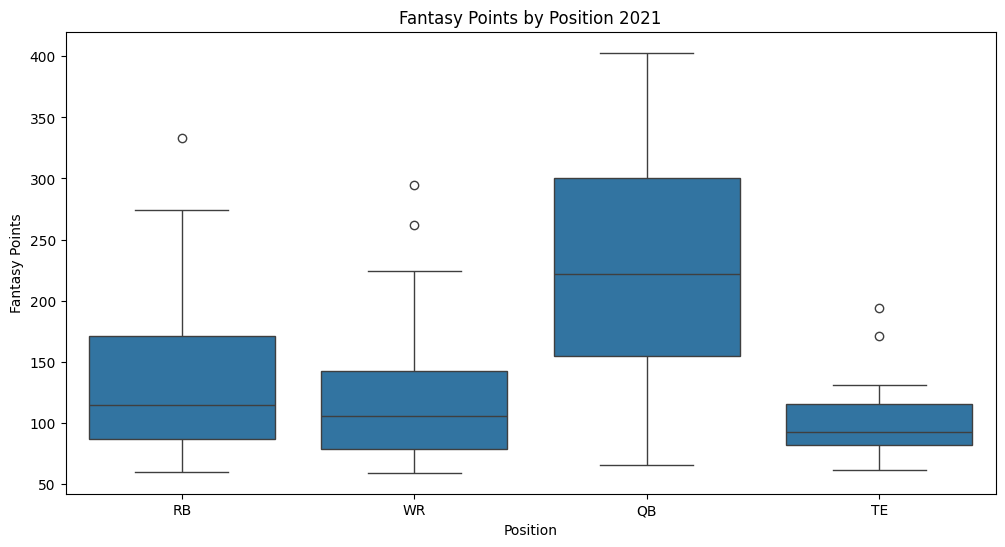

In [13]:
# Boxplot to compare fantasy points across positions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Fantasy Points', data=df_2021)
plt.title('Fantasy Points by Position 2021')
plt.show()

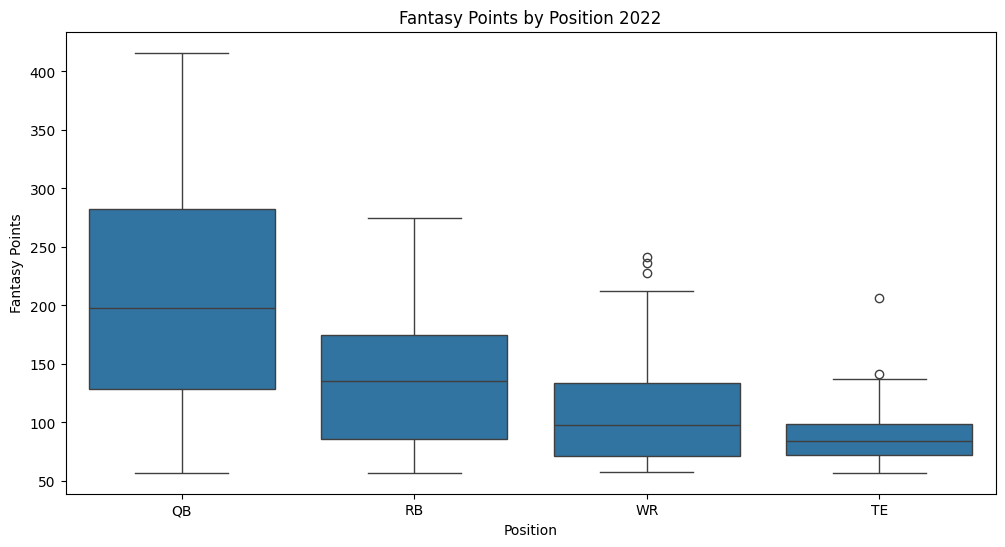

In [14]:
# Boxplot to compare fantasy points across positions
plt.figure(figsize=(12, 6))
sns.boxplot(x='Position', y='Fantasy Points', data=df_2022)
plt.title('Fantasy Points by Position 2022')
plt.show()

In [15]:
# Week 3 Start

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat([df_2019, df_2020, df_2021, df_2022], ignore_index=True)

# Clean player names by removing special characters
combined_df['Player'] = combined_df['Player'].str.replace(r'[^a-zA-Z.\s]', '', regex=True)

# Group by 'Player' and aggregate relevant numerical columns
aggregated_df = combined_df.groupby('Player').agg({
    'Rushing Yards': 'sum',
    'Receiving Yards': 'sum',
    'Passing Yards': 'sum',
    'Total TD': 'sum',
    'Fantasy Points': 'sum',
    'Games Played': 'sum',
    'Position': 'first',  # Get the first non-null position
}).reset_index()

# Calculate Yards from Scrimmage and Total Yards
aggregated_df['Yards_from_Scrimmage'] = aggregated_df['Rushing Yards'] + aggregated_df['Receiving Yards']
aggregated_df['Total_Yards'] = aggregated_df['Yards_from_Scrimmage'] + aggregated_df['Passing Yards']

# Calculate averages for aggregated statistics
aggregated_df['Avg_TD'] = aggregated_df['Total TD'] / aggregated_df['Games Played']
aggregated_df['Avg_Yards_from_Scrimmage'] = aggregated_df['Yards_from_Scrimmage'] / aggregated_df['Games Played']
aggregated_df['Avg_Passing_Yards'] = aggregated_df['Passing Yards'] / aggregated_df['Games Played']
aggregated_df['Avg_Total_Yards'] = aggregated_df['Total_Yards'] / aggregated_df['Games Played']

# Save the aggregated data to a new CSV file
aggregated_df.to_csv('aggregated_fantasy_data.csv', index=False)

Train Feature Set Shape: (288, 4)
Test Feature Set Shape: (72, 4)
Train Target Set Shape: (288,)
Test Target Set Shape: (72,)


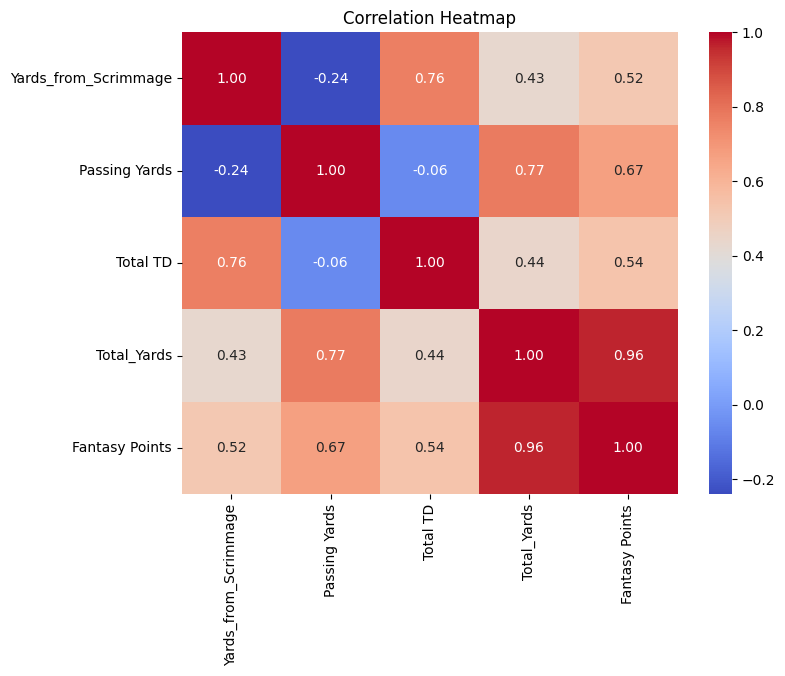

In [16]:
# Split Data (Train/Test)
X = aggregated_df[['Yards_from_Scrimmage', 'Passing Yards', 'Total TD', 'Total_Yards']]
y = aggregated_df['Fantasy Points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm the split sizes
print("Train Feature Set Shape:", X_train.shape)
print("Test Feature Set Shape:", X_test.shape)
print("Train Target Set Shape:", y_train.shape)
print("Test Target Set Shape:", y_test.shape)

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr = aggregated_df[['Yards_from_Scrimmage', 'Passing Yards', 'Total TD', 'Total_Yards', 'Fantasy Points']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#### Start of Week 4 ####
# Data Cleaning: Remove special characters from 'Player' column
aggregated_df['Player'] = aggregated_df['Player'].str.replace(r'[^a-zA-Z.\s]', '', regex=True)

In [18]:
# Handle missing data
imputer = SimpleImputer(strategy='mean')  # You can change the strategy based on needs (mean, median, etc.)
aggregated_df['Fantasy Points'] = imputer.fit_transform(aggregated_df[['Fantasy Points']])

In [19]:
# Outlier Treatment: Using IQR to detect and remove outliers in Fantasy Points
Q1 = aggregated_df['Fantasy Points'].quantile(0.25)
Q3 = aggregated_df['Fantasy Points'].quantile(0.75)
IQR = Q3 - Q1
# Filtering out outliers beyond 1.5*IQR
aggregated_df = aggregated_df[~((aggregated_df['Fantasy Points'] < (Q1 - 1.5 * IQR)) | (aggregated_df['Fantasy Points'] > (Q3 + 1.5 * IQR)))]

In [20]:
# Normalize and Standardize numerical features
scaler = StandardScaler()
numerical_features = ['Yards_from_Scrimmage', 'Passing Yards', 'Total TD', 'Fantasy Points']
aggregated_df[numerical_features] = scaler.fit_transform(aggregated_df[numerical_features])

# One-hot Encoding for categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Dropping first to avoid multicollinearity
encoded_position = encoder.fit_transform(aggregated_df[['Position']])
encoded_df = pd.DataFrame(encoded_position, columns=encoder.get_feature_names_out(['Position']))
aggregated_df = pd.concat([aggregated_df, encoded_df], axis=1)

In [21]:
# Remove unnecessary columns (e.g., 'Team' column if not needed)
aggregated_df.drop(columns=['Team'], inplace=True, errors='ignore')

# Handle duplicates by removing any duplicate rows
aggregated_df.drop_duplicates(inplace=True)

In [22]:
# Text Data Cleaning (if applicable): removing stop words, punctuation, lowercasing
# This is included as an example in case you have text data, modify if needed
aggregated_df['Player'] = aggregated_df['Player'].str.lower().str.replace(r'[^\w\s]', '', regex=True).str.strip()

# Aggregating relevant statistics (already done previously, no changes needed for now)
aggregated_df = aggregated_df.groupby('Player').agg({
    'Rushing Yards': 'sum',
    'Receiving Yards': 'sum',
    'Passing Yards': 'sum',
    'Total TD': 'sum',
    'Fantasy Points': 'sum',
    'Games Played': 'sum',
    'Position': 'first',
}).reset_index()

In [23]:
# Save processed data to a new CSV
aggregated_df.to_csv('processed_fantasy_data.csv', index=False)

print("Data processing complete. Here's the head of the cleaned dataframe:")
print(aggregated_df.head())

Data processing complete. Here's the head of the cleaned dataframe:
            Player  Rushing Yards  Receiving Yards  Passing Yards  Total TD  \
0      aaron jones         2987.0           1615.0      -0.311467  4.027857   
1     adam thielen           23.0           2785.0      -0.311467  2.532938   
2  adrian peterson         1502.0            243.0      -0.311467  1.038018   
3         aj brown           70.0           4491.0      -0.311467  2.532938   
4        aj dillon          803.0            519.0      -0.311467 -0.955208   

   Fantasy Points  Games Played Position  
0        2.730606          62.0       RB  
1        1.126495          55.0       WR  
2       -0.126419          31.0       RB  
3        1.914313          60.0       WR  
4        0.106129          34.0       RB  


In [24]:
##### Start of Week  5 ########
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Load your dataset
df = pd.read_csv('aggregated_fantasy_data.csv')

# Feature 1: Create a new feature 'Total_Yards' by adding rushing and receiving yards
df['Total_Yards'] = df['Rushing Yards'] + df['Receiving Yards']

# Feature 2: Create 'Touchdown_Efficiency' by dividing total touchdowns by total yards
df['Touchdown_Efficiency'] = df['Total TD'] / df['Total_Yards']

# Feature 3: Create 'Fantasy Points per Game (FP_per_Game)' by dividing fantasy points by games played
df['FP_per_Game'] = df['Fantasy Points'] / df['Games Played']

# Drop NaN or infinite values that may result from division
df['Touchdown_Efficiency'].replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Touchdown_Efficiency'], inplace=True)

# View the new columns added
df[['Player', 'Rushing Yards', 'Receiving Yards', 'Total_Yards', 'Total TD', 'Touchdown_Efficiency', 'FP_per_Game']].head()


/tmp/ipykernel_2659909/2416030159.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Touchdown_Efficiency'].replace([np.inf, -np.inf], np.nan, inplace=True)


,Player,Rushing Yards,Receiving Yards,Total_Yards,Total TD,Touchdown_Efficiency,FP_per_Game
0,A.J. Brown,70.0,4491,4561.0,21.0,0.004604,11.216667
1,A.J. Green,0.0,1371,1371.0,2.0,0.001459,5.218750
2,AJ Dillon,803.0,519,1322.0,0.0,0.000000,8.588235
3,Aaron Jones,2987.0,1615,4602.0,30.0,0.006519,13.629032
4,Aaron Rodgers,433.0,-10,423.0,4.0,0.009456,18.938462


In [25]:
# Select only numeric features (excluding player names or other categorical features)
numeric_columns = df.select_dtypes(include=['number']).columns

In [26]:
# Week 6: PCA

df = pd.read_csv('aggregated_fantasy_data.csv')
df['Total_Yards'] = df['Rushing Yards'] + df['Receiving Yards']
# Avoid division by zero
df['Touchdown_Efficiency'] = np.where(df['Total_Yards'] != 0, df['Total TD'] / df['Total_Yards'], 0)
df['FP_per_Game'] = df['Fantasy Points'] / df['Games Played']

# Split data first to prevent leakage
X = df[numeric_columns].drop(columns=['Fantasy Points'])
y = df['Fantasy Points']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling and PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['int64', 'float64']))
X_val_scaled = scaler.transform(X_val.select_dtypes(include=['int64', 'float64']))

pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Model
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train_pca, y_train)

# Evaluate the model
y_val_pred = grid_search.best_estimator_.predict(X_val_pca)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {val_rmse}")
print(f"Validation R^2: {val_r2}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Validation RMSE: 159.2263800401631
Validation R^2: 0.7018433605794435


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Base model
rf_base = RandomForestRegressor(random_state=42)
rf_base.fit(X_train, y_train)

# Predictions
y_train_pred_base = rf_base.predict(X_train)
y_val_pred_base = rf_base.predict(X_val)

# Metrics calculation
train_rmse_base = np.sqrt(mean_squared_error(y_train, y_train_pred_base))
val_rmse_base = np.sqrt(mean_squared_error(y_val, y_val_pred_base))

train_r2_base = r2_score(y_train, y_train_pred_base)
val_r2_base = r2_score(y_val, y_val_pred_base)

print(f"Base Model - Training RMSE: {train_rmse_base}, Validation RMSE: {val_rmse_base}")
print(f"Base Model - Training R²: {train_r2_base}, Validation R²: {val_r2_base}")

Base Model - Training RMSE: 18.48719200028916, Validation RMSE: 30.64079352395721
Base Model - Training R²: 0.9950859234251188, Validation R²: 0.9889588462379747


In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
rf_tuned = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Predictions
y_train_pred_tuned = grid_search.best_estimator_.predict(X_train)
y_val_pred_tuned = grid_search.best_estimator_.predict(X_val)

# Metrics calculation
train_rmse_tuned = np.sqrt(mean_squared_error(y_train, y_train_pred_tuned))
val_rmse_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned))

train_r2_tuned = r2_score(y_train, y_train_pred_tuned)
val_r2_tuned = r2_score(y_val, y_val_pred_tuned)

print(f"Tuned Model - Training RMSE: {train_rmse_tuned}, Validation RMSE: {val_rmse_tuned}")
print(f"Tuned Model - Training R²: {train_r2_tuned}, Validation R²: {val_r2_tuned}")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Tuned Model - Training RMSE: 16.94819532653518, Validation RMSE: 30.67567504124581
Tuned Model - Training R²: 0.9958700296141166, Validation R²: 0.9889336934028812


In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize features before applying PCA
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Apply PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Train Random Forest on PCA-transformed data
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train)

# Predictions
y_train_pred_pca = rf_pca.predict(X_train_pca)
y_val_pred_pca = rf_pca.predict(X_val_pca)

# Metrics calculation
train_rmse_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_pca))
val_rmse_pca = np.sqrt(mean_squared_error(y_val, y_val_pred_pca))

train_r2_pca = r2_score(y_train, y_train_pred_pca)
val_r2_pca = r2_score(y_val, y_val_pred_pca)

print(f"PCA Model - Training RMSE: {train_rmse_pca}, Validation RMSE: {val_rmse_pca}")
print(f"PCA Model - Training R²: {train_r2_pca}, Validation R²: {val_r2_pca}")

PCA Model - Training RMSE: 30.30089734988608, Validation RMSE: 159.26648103711102
PCA Model - Training R²: 0.9867988733775771, Validation R²: 0.7016931607936405


In [30]:
### Week 7 ###
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Data preparation (same as previous)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# Define the model
xgb_base = xgb.XGBRegressor(random_state=42)

# Base model with default settings
xgb_base.fit(X_train_pca, y_train)
y_val_pred_base = xgb_base.predict(X_val_pca)
val_rmse_base = np.sqrt(mean_squared_error(y_val, y_val_pred_base))
val_r2_base = r2_score(y_val, y_val_pred_base)
print(f"Base XGBoost - Validation RMSE: {val_rmse_base}, Validation R²: {val_r2_base}")

# Variation 1 - Tune learning_rate and max_depth
param_grid_1 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
xgb_model_1 = xgb.XGBRegressor(random_state=42)
grid_search_1 = GridSearchCV(estimator=xgb_model_1, param_grid=param_grid_1, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search_1.fit(X_train_pca, y_train)
y_val_pred_1 = grid_search_1.best_estimator_.predict(X_val_pca)
val_rmse_1 = np.sqrt(mean_squared_error(y_val, y_val_pred_1))
val_r2_1 = r2_score(y_val, y_val_pred_1)
print(f"Variation 1 - Validation RMSE: {val_rmse_1}, Validation R²: {val_r2_1}")

Base XGBoost - Validation RMSE: 174.2240220019852, Validation R²: 0.6430310010910034
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Variation 1 - Validation RMSE: 167.77154725766204, Validation R²: 0.6689825057983398


In [31]:
# Variation 2 - Tune alpha (L1) and lambda (L2)
param_grid_2 = {
    'alpha': [0, 0.1, 0.5],
    'lambda': [1, 1.5, 2]
}
xgb_model_2 = xgb.XGBRegressor(random_state=42)
grid_search_2 = GridSearchCV(estimator=xgb_model_2, param_grid=param_grid_2, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search_2.fit(X_train_pca, y_train)
y_val_pred_2 = grid_search_2.best_estimator_.predict(X_val_pca)
val_rmse_2 = np.sqrt(mean_squared_error(y_val, y_val_pred_2))
val_r2_2 = r2_score(y_val, y_val_pred_2)
print(f"Variation 2 - Validation RMSE: {val_rmse_2}, Validation R²: {val_r2_2}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Variation 2 - Validation RMSE: 175.2347497133201, Validation R²: 0.638877272605896


In [32]:
# Variation 3 - Tune subsample and colsample_bytree
param_grid_3 = {
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1]
}
xgb_model_3 = xgb.XGBRegressor(random_state=42)
grid_search_3 = GridSearchCV(estimator=xgb_model_3, param_grid=param_grid_3, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid_search_3.fit(X_train_pca, y_train)
y_val_pred_3 = grid_search_3.best_estimator_.predict(X_val_pca)
val_rmse_3 = np.sqrt(mean_squared_error(y_val, y_val_pred_3))
val_r2_3 = r2_score(y_val, y_val_pred_3)
print(f"Variation 3 - Validation RMSE: {val_rmse_3}, Validation R²: {val_r2_3}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Variation 3 - Validation RMSE: 183.33484034639557, Validation R²: 0.604720413684845


In [33]:
# Select the best model based on RMSE or R² on the validation set
results = {
    "Base": (val_rmse_base, val_r2_base),
    "Variation 1": (val_rmse_1, val_r2_1),
    "Variation 2": (val_rmse_2, val_r2_2),
    "Variation 3": (val_rmse_3, val_r2_3)
}

best_model = min(results, key=lambda x: results[x][0])  # Select based on lowest RMSE
print(f"Best model: {best_model}, RMSE: {results[best_model][0]}, R²: {results[best_model][1]}")

Best model: Variation 1, RMSE: 167.77154725766204, R²: 0.6689825057983398


In [34]:
### End of Week 7 ###

In [35]:
### Start of Week 8 ### 

In [36]:
# Import needed libraries

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [37]:
# Data preparation (same as previous)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [38]:
# Define the model
lgb_base = lgb.LGBMRegressor(random_state=42)

# Base model with default settings
lgb_base.fit(X_train_pca, y_train)
y_val_pred_base = lgb_base.predict(X_val_pca)
val_rmse_base = np.sqrt(mean_squared_error(y_val, y_val_pred_base))
val_r2_base = r2_score(y_val, y_val_pred_base)

print(f"Base LightGBM - Validation RMSE: {val_rmse_base}, Validation R²: {val_r2_base}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 485
[LightGBM] [Info] Number of data points in the train set: 288, number of used features: 5
[LightGBM] [Info] Start training from score 291.545139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [39]:
# Variation 1 - Tune learning_rate and num_leaves
param_grid_1 = {
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100]
}
lgb_model_1 = lgb.LGBMRegressor(random_state=42)
grid_search_1 = GridSearchCV(estimator=lgb_model_1, param_grid=param_grid_1, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search_1.fit(X_train_pca, y_train)
y_val_pred_1 = grid_search_1.best_estimator_.predict(X_val_pca)
val_rmse_1 = np.sqrt(mean_squared_error(y_val, y_val_pred_1))
val_r2_1 = r2_score(y_val, y_val_pred_1)
print(f"Variation 1 - Validation RMSE: {val_rmse_1}, Validation R²: {val_r2_1}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ................colsample_bytree=0.6, subsample=0.6; total time=   0.2s
[CV] END ..................colsample_bytree=0.6, subsample=1; total time=   0.2s
[CV] END ................colsample_bytree=0.8, subsample=0.6; total time=   0.2s
[CV] END ..................colsample_bytree=0.8, subsample=1; total time=   0.3s
[CV] END ..................colsample_bytree=1, subsample=0.6; total time=   0.4s
[CV] END ..................colsample_bytree=1, subsample=0.8; total time=   0.3s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 329
[LightGBM] [Info] Number of data points in the train set: 192, number of used features: 5
[LightGBM] [Info] Start training from score 284.687500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

In [40]:
# Variation 2 - Tune max_depth and min_child_samples
param_grid_2 = {
    'max_depth': [5, 10, 15],
    'min_child_samples': [10, 20, 30]
}
lgb_model_2 = lgb.LGBMRegressor(random_state=42)
grid_search_2 = GridSearchCV(estimator=lgb_model_2, param_grid=param_grid_2, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search_2.fit(X_train_pca, y_train)
y_val_pred_2 = grid_search_2.best_estimator_.predict(X_val_pca)
val_rmse_2 = np.sqrt(mean_squared_error(y_val, y_val_pred_2))
val_r2_2 = r2_score(y_val, y_val_pred_2)
print(f"Variation 2 - Validation RMSE: {val_rmse_2}, Validation R²: {val_r2_2}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [41]:
# Variation 3 - Tune bagging_fraction and feature_fraction
param_grid_3 = {
    'bagging_fraction': [0.6, 0.8, 1],
    'feature_fraction': [0.6, 0.8, 1]
}
lgb_model_3 = lgb.LGBMRegressor(random_state=42)
grid_search_3 = GridSearchCV(estimator=lgb_model_3, param_grid=param_grid_3, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid_search_3.fit(X_train_pca, y_train)
y_val_pred_3 = grid_search_3.best_estimator_.predict(X_val_pca)
val_rmse_3 = np.sqrt(mean_squared_error(y_val, y_val_pred_3))
val_r2_3 = r2_score(y_val, y_val_pred_3)
print(f"Variation 3 - Validation RMSE: {val_rmse_3}, Validation R²: {val_r2_3}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [42]:
# Select the best model based on RMSE or R² on the validation set
results = {
    "Base": (val_rmse_base, val_r2_base),
    "Variation 1": (val_rmse_1, val_r2_1),
    "Variation 2": (val_rmse_2, val_r2_2),
    "Variation 3": (val_rmse_3, val_r2_3)
}

best_model = min(results, key=lambda x: results[x][0])  # Select based on lowest RMSE
print(f"Best model: {best_model}, RMSE: {results[best_model][0]}, R²: {results[best_model][1]}")

Best model: Variation 2, RMSE: 156.56716050438033, R²: 0.711719151261332


In [43]:
### Start of Week 9 ###
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Models defined in a dictionary for easier access
models = {
    'Random Forest Base': rf_base,
    'Random Forest Tuned': rf_tuned,
    'Random Forest PCA': rf_pca,
    'XGBoost Base': xgb_base,
    'XGBoost Model 1': xgb_model_1,
    'XGBoost Model 2': xgb_model_2,
    'XGBoost Model 3': xgb_model_3,
    'LightGBM Base': lgb_base,
    'LightGBM Model 1': lgb_model_1,
    'LightGBM Model 2': lgb_model_2,  
    'LightGBM Model 3': lgb_model_3
}

In [44]:
model_performance = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "R2": []
}

# Fit and evaluate each model
for model_name, model_instance in models.items():
    model_instance.fit(X_train, y_train)
    y_pred_val = model_instance.predict(X_val)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
    mae = mean_absolute_error(y_val, y_pred_val)
    r2 = r2_score(y_val, y_pred_val)

    # Append results
    model_performance["Model"].append(model_name)
    model_performance["RMSE"].append(rmse)
    model_performance["MAE"].append(mae)
    model_performance["R2"].append(r2)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 288, number of used features: 13
[LightGBM] [Info] Start training from score 291.545139
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [45]:
# Assuming `X_train` was the training feature set used for training the model
expected_features = list(X_train.columns)  # Columns the model was trained on

# Reorder X_test to match the expected columns, filling any missing columns with zeroes
X_test = X_test.reindex(columns=expected_features, fill_value=0)

In [46]:
# Convert results to DataFrame
performance_df = pd.DataFrame(model_performance)
display(performance_df)

# Select best model based on RMSE
best_model_name = performance_df.loc[performance_df['RMSE'].idxmin(), 'Model']
best_model_instance = models[best_model_name]

# Predict and evaluate on test data
y_pred_test = best_model_instance.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
test_mae = mean_absolute_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Best Model: {best_model_name}")
print(f"Test RMSE: {test_rmse}, Test MAE: {test_mae}, Test R2: {test_r2}")

,Model,RMSE,MAE,R2
0,Random Forest Base,30.640794,20.875833,0.988959
1,Random Forest Tuned,30.640794,20.875833,0.988959
2,Random Forest PCA,30.640794,20.875833,0.988959
3,XGBoost Base,27.432285,17.295185,0.991150
4,XGBoost Model 1,27.432285,17.295185,0.991150
5,XGBoost Model 2,27.432285,17.295185,0.991150
6,XGBoost Model 3,27.432285,17.295185,0.991150
7,LightGBM Base,35.408759,21.251209,0.985255
8,LightGBM Model 1,35.408759,21.251209,0.985255
9,LightGBM Model 2,35.408759,21.251209,0.985255


Best Model: XGBoost Base
Test RMSE: 372.8965784555459, Test MAE: 269.71080186631946, Test R2: -0.6352764368057251


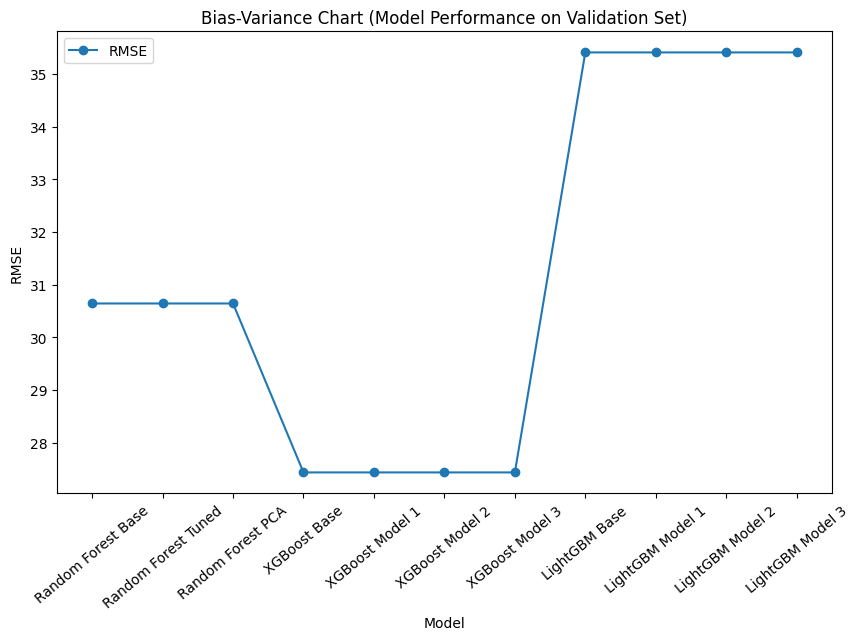

In [47]:
import matplotlib.pyplot as plt

# Plotting RMSE for each model as a proxy for bias-variance trade-off
plt.figure(figsize=(10, 6))
plt.plot(performance_df["Model"], performance_df["RMSE"], marker='o', label="RMSE")
plt.xlabel("Model")
plt.ylabel("RMSE")
plt.title("Bias-Variance Chart (Model Performance on Validation Set)")
plt.xticks(rotation=40)
plt.legend()
plt.show()

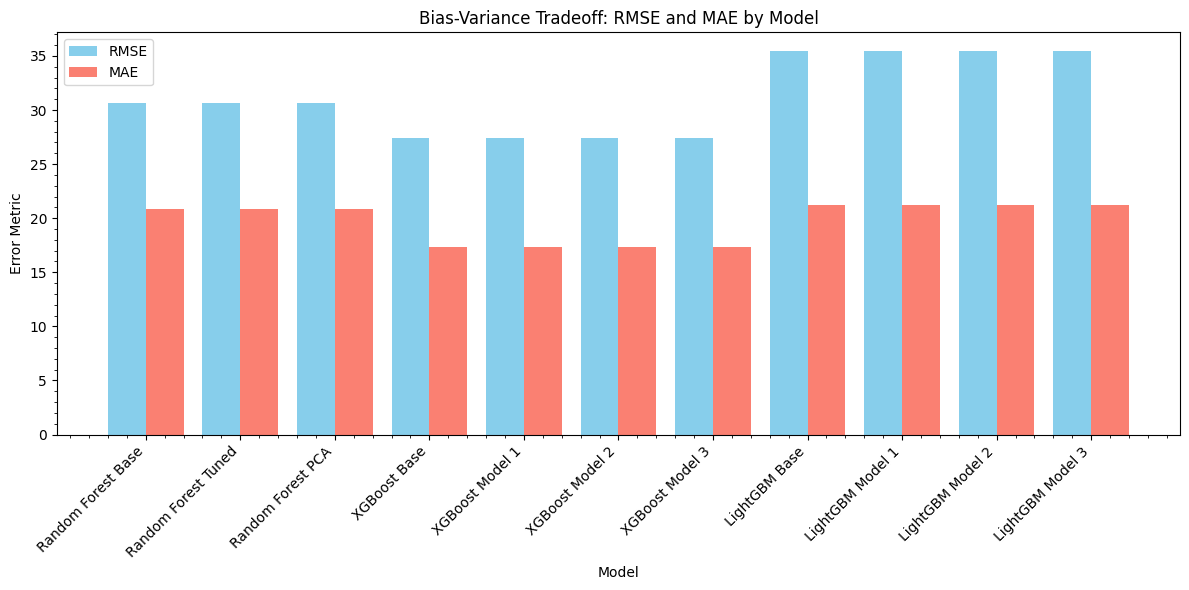

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data setup
data = {
    'Model': [
        'Random Forest Base', 'Random Forest Tuned', 'Random Forest PCA',
        'XGBoost Base', 'XGBoost Model 1', 'XGBoost Model 2', 'XGBoost Model 3',
        'LightGBM Base', 'LightGBM Model 1', 'LightGBM Model 2', 'LightGBM Model 3'
    ],
    'RMSE': [
        30.640794, 30.640794, 30.640794,
        27.432285, 27.432285, 27.432285, 27.432285,
        35.408759, 35.408759, 35.408759, 35.408759
    ],
    'MAE': [
        20.875833, 20.875833, 20.875833,
        17.295185, 17.295185, 17.295185, 17.295185,
        21.251209, 21.251209, 21.251209, 21.251209
    ]
}

df = pd.DataFrame(data)

# Plotting RMSE and MAE
fig, ax = plt.subplots(figsize=(12, 6))

# Define bar width and position for side-by-side bars
bar_width = 0.4
x = np.arange(len(df['Model']))

# Plot RMSE
ax.bar(x - bar_width/2, df['RMSE'], bar_width, label='RMSE', color='skyblue')
# Plot MAE
ax.bar(x + bar_width/2, df['MAE'], bar_width, label='MAE', color='salmon')

# Customize y-axis with smaller gaps
ax.set_yticks(np.arange(0, 40, 5))  # Adjust step size to make gaps smaller
ax.minorticks_on()
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

# Set labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Error Metric')
ax.set_title('Bias-Variance Tradeoff: RMSE and MAE by Model')
ax.set_xticks(x)
ax.set_xticklabels(df['Model'], rotation=45, ha="right")
ax.legend()

plt.tight_layout()
plt.show()

In [49]:
### Week 10 ###

In [50]:
# Week 10 - Data Improvements, Model Refitting, and Performance Evaluation

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('aggregated_fantasy_data.csv')

# Display the first few rows to understand the structure
print(df.head())

          Player  Rushing Yards  Receiving Yards  Passing Yards  Total TD  \
0     A.J. Brown           70.0             4491            0.0      21.0   
1     A.J. Green            0.0             1371            0.0       2.0   
2      AJ Dillon          803.0              519            0.0       0.0   
3    Aaron Jones         2987.0             1615            0.0      30.0   
4  Aaron Rodgers          433.0              -10         7994.0       4.0   

   Fantasy Points  Games Played Position  Yards_from_Scrimmage  Total_Yards  \
0             673            60       WR                4561.0       4561.0   
1             167            32       WR                1371.0       1371.0   
2             292            34       RB                1322.0       1322.0   
3             845            62       RB                4602.0       4602.0   
4            1231            65       QB                 423.0       8417.0   

     Avg_TD  Avg_Yards_from_Scrimmage  Avg_Passing_Yards  Avg_

In [51]:
# Week 10 - Part 1: Data Improvements and Enhancements
# -----------------------------------------------------

# Feature Engineering
# Create new features for Total Yards and Yards from Scrimmage
df['Total_Yards'] = df['Rushing Yards'] + df['Receiving Yards'] + df['Passing Yards']
df['Yards_from_Scrimmage'] = df['Rushing Yards'] + df['Receiving Yards']

# Create average metrics per game
df['Avg_Rushing_Yards'] = df['Rushing Yards'] / df['Games Played']
df['Avg_Receiving_Yards'] = df['Receiving Yards'] / df['Games Played']
df['Avg_Passing_Yards'] = df['Passing Yards'] / df['Games Played']
df['Avg_TD'] = df['Total TD'] / df['Games Played']
df['Avg_Yards_from_Scrimmage'] = df['Yards_from_Scrimmage'] / df['Games Played']

# Handle Missing Values using SimpleImputer (mean strategy for numeric columns)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Encoding categorical data (Position)
df_encoded = pd.get_dummies(df, columns=['Position'], drop_first=True)

# Split the dataset into features (X) and target (y)
X = df_encoded.drop(columns=['Player', 'Fantasy Points'])  # Dropping 'Player' and 'Fantasy Points' columns
y = df_encoded['Fantasy Points']  # Target variable (Fantasy Points)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

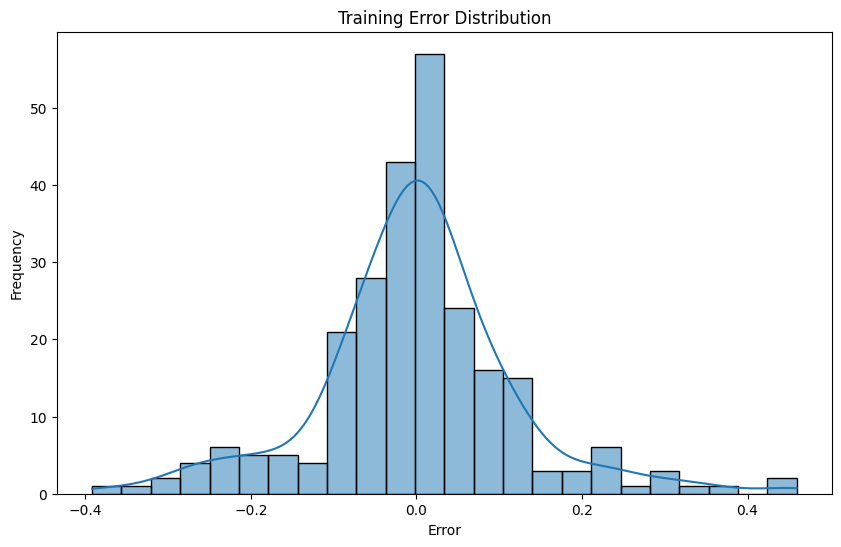

In [52]:
# Week 10 - Part 2: Model Training and Error Analysis
# --------------------------------------------------

# Initialize XGBoost model
model = XGBRegressor()

# Train the model on the training data
model.fit(X_train, y_train)

# Model Error Analysis - Analyze residuals on training data
y_train_pred = model.predict(X_train)
train_errors = y_train - y_train_pred

# Plotting the error distribution for the training dataset
plt.figure(figsize=(10,6))
sns.histplot(train_errors, kde=True)
plt.title('Training Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

In [53]:
# Week 10 - Part 3: Model Refitting to the New Data
# ---------------------------------------------------

# We can perform model refitting after making changes to the data or model
# If additional feature engineering or transformation is done, refitting is necessary
model_refit = XGBRegressor()

# Train the model on the training data again (after any data improvements)
model_refit.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [54]:
# Week 10 - Part 4: Model Performance Evaluation
# ---------------------------------------------------

# Evaluate model performance on training, validation, and test datasets
train_rmse = np.sqrt(((y_train - model_refit.predict(X_train)) ** 2).mean())
val_rmse = np.sqrt(((y_val - model_refit.predict(X_val)) ** 2).mean())
test_rmse = np.sqrt(((y_test - model_refit.predict(X_test)) ** 2).mean())

# Print RMSE for all datasets
print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Test RMSE: {test_rmse}")

# Cross-validation to check performance (using training data)
cv_scores = cross_val_score(model_refit, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-validation RMSE: {-cv_scores.mean()}")

# Week 10 - Summary of the Week's Work
# --------------------------------------

# Brief recap of what was done this week:
# 1. Data improvements were made by adding new features like Total_Yards and Avg_Yards_from_Scrimmage.
# 2. The missing values in the dataset were imputed using the mean strategy.
# 3. The model was trained and evaluated on the training, validation, and test datasets.
# 4. We also performed error analysis using residuals and visualized the errors.

Training RMSE: 0.12036302922093382
Validation RMSE: 70.58586895524883
Test RMSE: 50.297517474045584
Cross-validation RMSE: 78.35450767848394


<Figure size 1000x800 with 0 Axes>

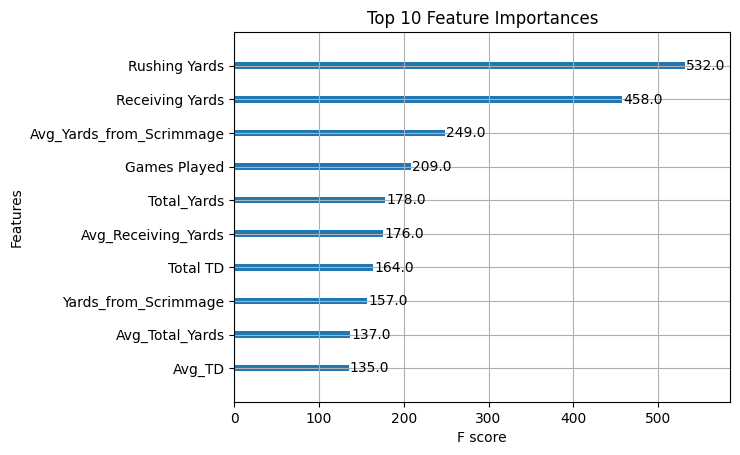

Top 10 Important Features:
                     Feature  Importance
0              Rushing Yards       532.0
1            Receiving Yards       458.0
8   Avg_Yards_from_Scrimmage       249.0
4               Games Played       209.0
6                Total_Yards       178.0
12       Avg_Receiving_Yards       176.0
3                   Total TD       164.0
5       Yards_from_Scrimmage       157.0
10           Avg_Total_Yards       137.0
7                     Avg_TD       135.0


In [55]:
# Week 11 - Feature Importance for XGBoost
# Extract feature importance from the final XGBoost model

# Using the XGBoost Base Model
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance directly using XGBoost's built-in function
plt.figure(figsize=(10, 8))
plot_importance(model, importance_type='weight', max_num_features=10, title="Top 10 Feature Importances")
plt.show()

# Extract feature importance as a DataFrame
feature_importances = model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame({
    'Feature': feature_importances.keys(),
    'Importance': feature_importances.values()
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:")
print(importance_df.head(10))

Input shape: (1, 17), SHAP values shape: (1, 17)


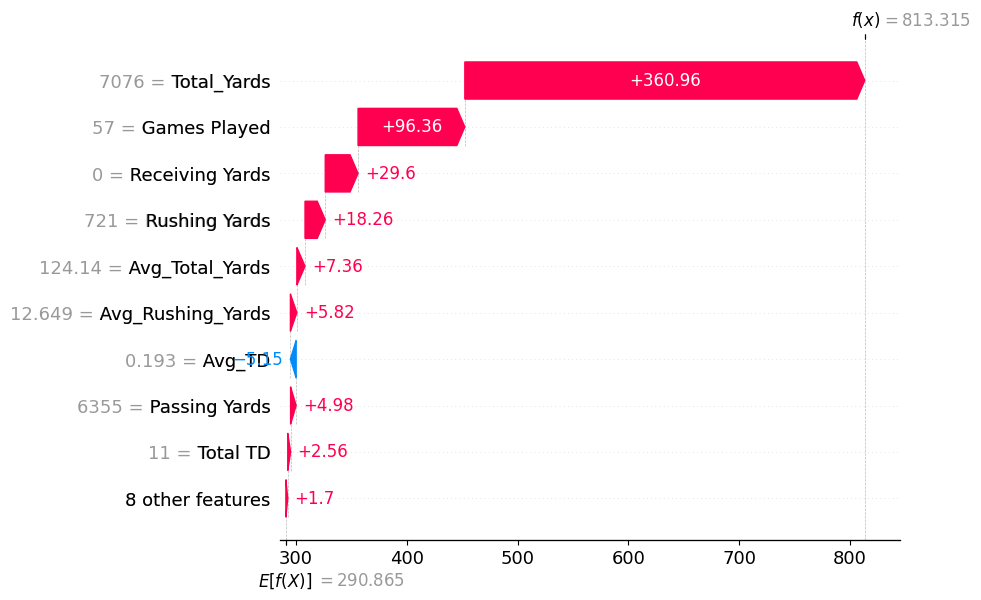

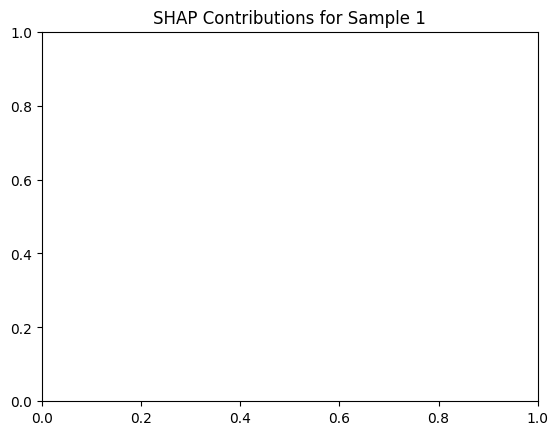

Input shape: (1, 17), SHAP values shape: (1, 17)


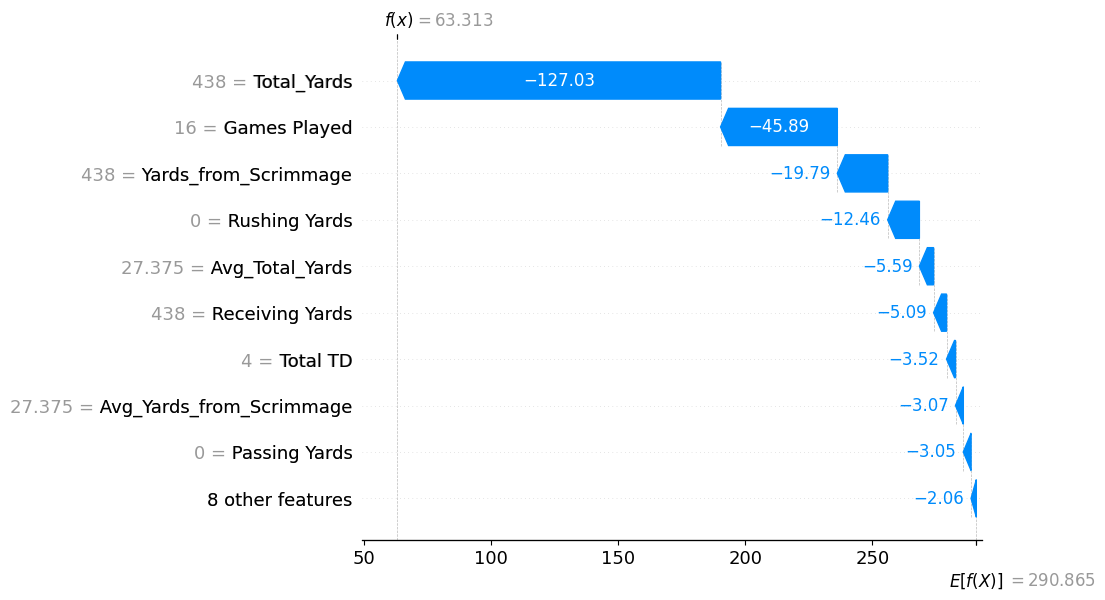

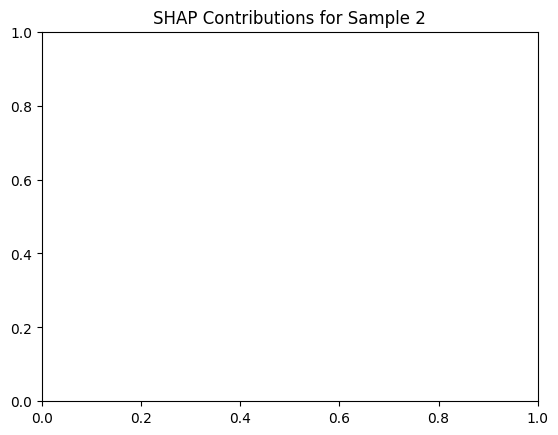

Input shape: (1, 17), SHAP values shape: (1, 17)


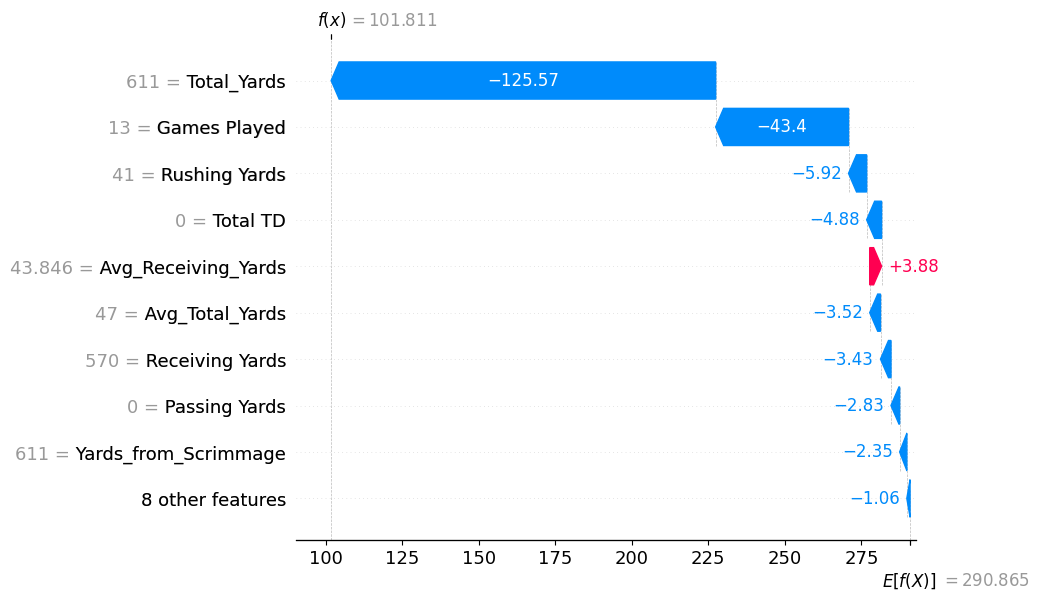

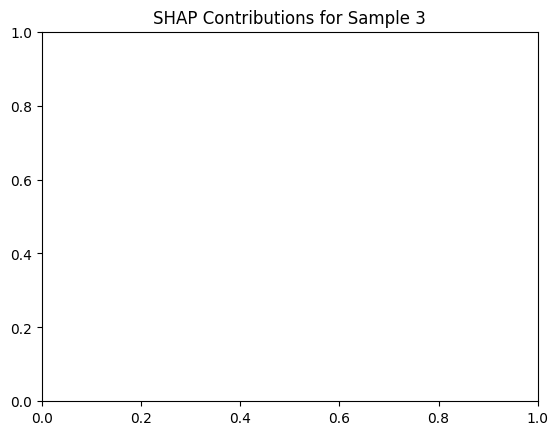

Input shape: (1, 17), SHAP values shape: (1, 17)


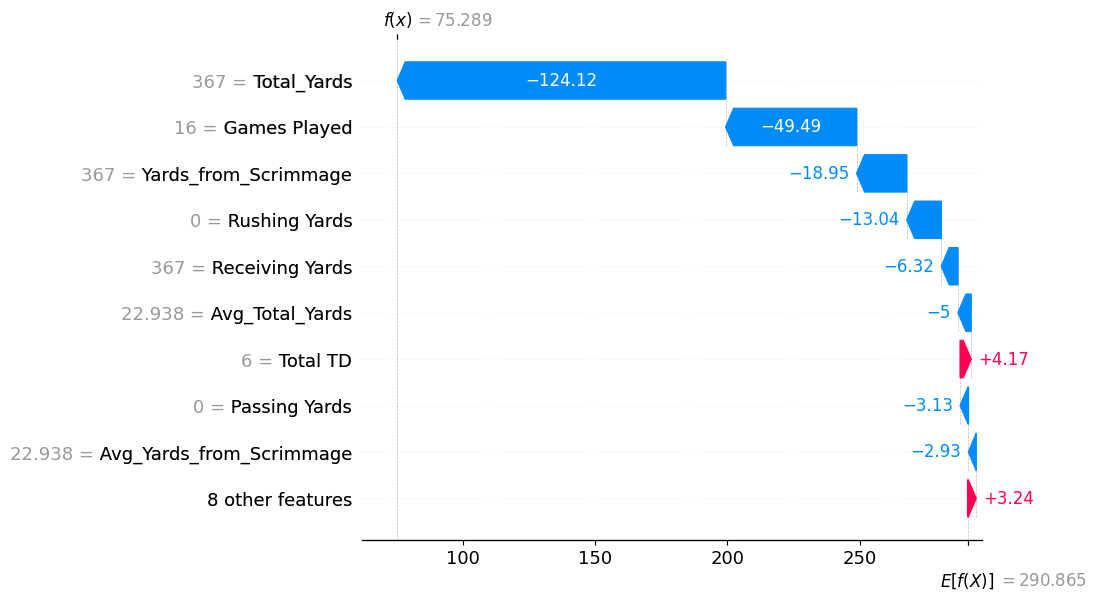

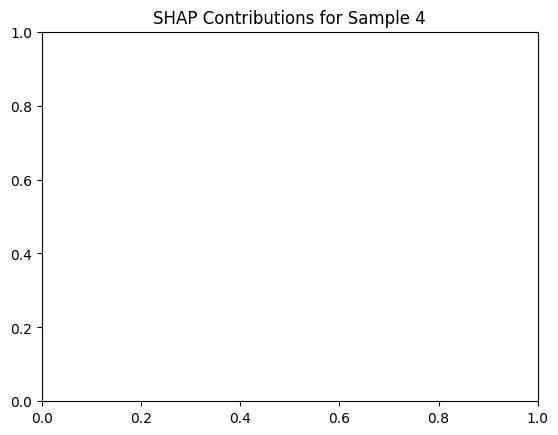

Input shape: (1, 17), SHAP values shape: (1, 17)


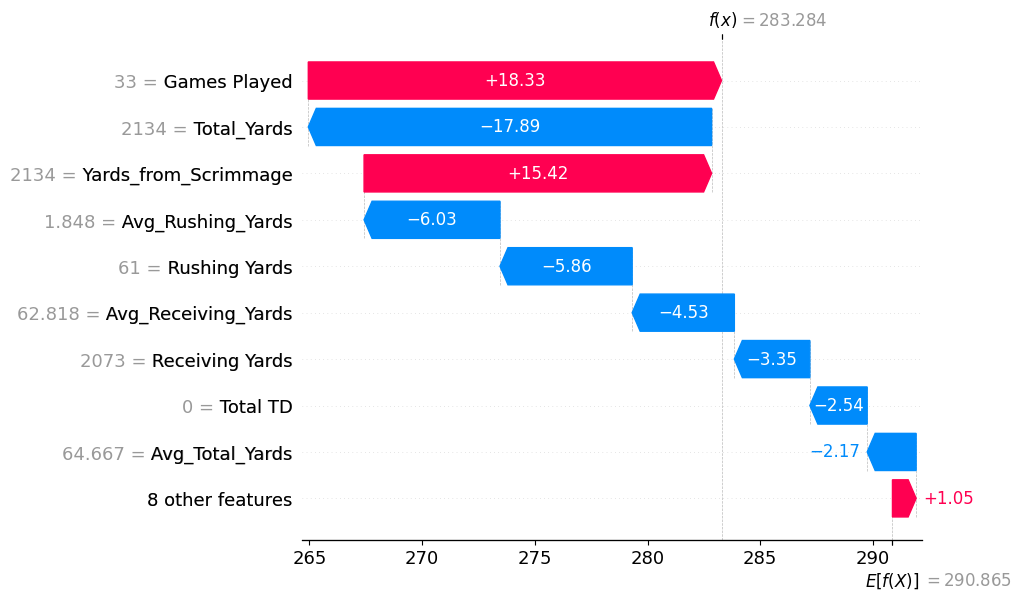

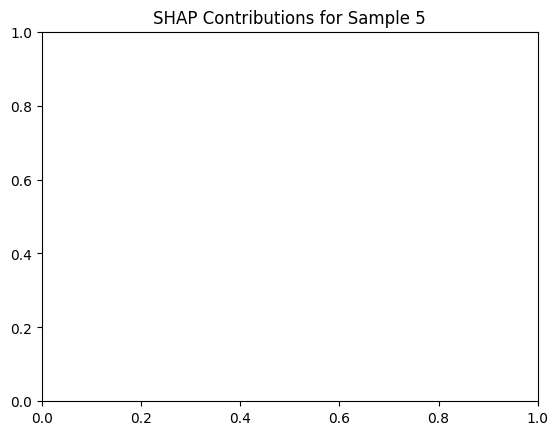

In [56]:
# Week 11 - Analyzing Individual Predictions for XGBoost
import shap

# Position values are boolean so we convert them to float
X_train = X_train.astype(float)

# Create SHAP explainer for the XGBoost model
explainer = shap.Explainer(model, X_train)

# Randomly select 5 rows from the test set
random_samples = X_test.sample(5, random_state=42)
predictions = model.predict(random_samples)

# Analyze each prediction
for idx, input_row in enumerate(X_test.sample(5, random_state=42).iterrows()):
    # Extract the single row
    input_features = input_row[1].to_frame().T  # Convert to DataFrame with one row
    
    # Generate SHAP values
    shap_values = explainer(input_features)
    
    # Debug shapes
    print(f"Input shape: {input_features.shape}, SHAP values shape: {shap_values.values.shape}")
    
    # Plot SHAP waterfall for a single instance
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_values.values[0],
            base_values=shap_values.base_values[0],
            data=input_features.values[0],
            feature_names=input_features.columns
        )
    )
    plt.title(f"SHAP Contributions for Sample {idx+1}")
    plt.show()

Correlation of Games Played with target: 0.797189395314066


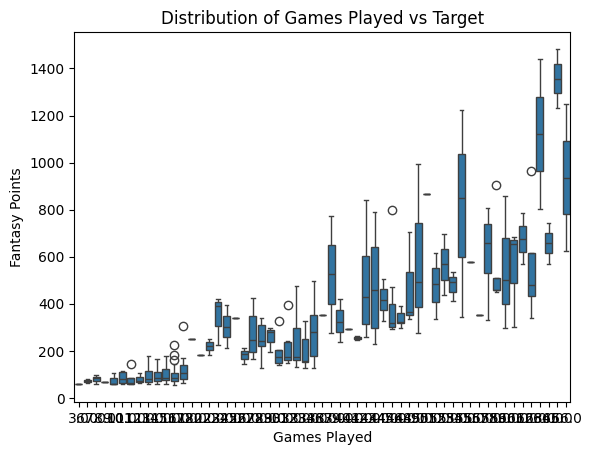

In [57]:
# Week 11 - Bias Detection
# Check for the inclusion of relevant features and their potential correlation with the target

protected_columns = ['Games Played']
'''Games Played could potentially be a proxy for injuries or other external factors, but it is a legitimate and meaningful statistic 
in the model. On the other hand, variables like position (QB, RB, etc.) are not protected categories in any legal or ethical sense. 
They are categorical features that are inherent to a player’s role in the game, and their inclusion is necessary to accurately model 
the prediction of fantasy football points.
'''

for col in protected_columns:
    if col in X_train.columns:
        correlation = X_train[col].corr(y_train)
        print(f"Correlation of {col} with target: {correlation}")
        
        # Optional visualization
        if 'Position' in col:
            # For positions, barplot might be better to understand distributions
            sns.barplot(data=X_train, x=col, y=y_train)
            plt.title(f"Distribution of {col} vs Target")
        else:
            # For continuous variables like Games Played, use boxplot
            sns.boxplot(data=X_train, x=col, y=y_train)
            plt.title(f"Distribution of {col} vs Target")
        plt.show()

In [58]:
# Week 11 - Bias Mitigation and Model Retraining 

# Remove protected category features (if included in the dataset)
X_train_adj = X_train.drop(columns=protected_columns, errors='ignore')
X_val_adj = X_val.drop(columns=protected_columns, errors='ignore')
X_test_adj = X_test.drop(columns=protected_columns, errors='ignore')

# Retrain the model on adjusted training data
model_refit = xgb.XGBRegressor(**model.get_params())  # Copy parameters from the original model
model_refit.fit(X_train_adj, y_train)

# Evaluate metrics on adjusted data
from sklearn.metrics import mean_squared_error

train_rmse_adj = np.sqrt(mean_squared_error(y_train, model_refit.predict(X_train_adj)))
val_rmse_adj = np.sqrt(mean_squared_error(y_val, model_refit.predict(X_val_adj)))
test_rmse_adj = np.sqrt(mean_squared_error(y_test, model_refit.predict(X_test_adj)))

print(f"Adjusted Training RMSE: {train_rmse_adj}")
print(f"Adjusted Validation RMSE: {val_rmse_adj}")
print(f"Adjusted Test RMSE: {test_rmse_adj}")

Adjusted Training RMSE: 0.16387210111829767
Adjusted Validation RMSE: 73.5157605785658
Adjusted Test RMSE: 51.892565489237626


In [59]:
import random
# Randomly select 5 samples from the test set
random_indices = random.sample(range(X_test.shape[0]), 5)
selected_samples = X_test.iloc[random_indices]
selected_true_values = y_test.iloc[random_indices]

# Predict the fantasy football points for the selected samples
selected_predictions = model.predict(selected_samples)

# Display predictions and true values
print("Selected Predictions and True Values:")
for i, idx in enumerate(random_indices):
    print(f"Sample {idx}: Predicted: {selected_predictions[i]}, True Value: {selected_true_values.iloc[i]}")

Selected Predictions and True Values:
Sample 52: Predicted: 220.34506225585938, True Value: 187.0
Sample 33: Predicted: 325.1290588378906, True Value: 317.0
Sample 51: Predicted: 592.7568359375, True Value: 560.0
Sample 4: Predicted: 280.4969482421875, True Value: 275.0
Sample 19: Predicted: 813.3154296875, True Value: 996.0


In [60]:
# Analyze the importance of features in each prediction
# Let's also calculate feature importance per prediction 
importances = model.feature_importances_

# Create a DataFrame for the selected samples and their feature values
sample_features = selected_samples.copy()
sample_features['True Value'] = selected_true_values.values
sample_features['Predicted Value'] = selected_predictions

# Now, analyze the importance of each feature for the selected predictions
for i, idx in enumerate(random_indices):
    print(f"\nPrediction for Sample {idx}:")
    sample = sample_features.iloc[i]
    print(f"Predicted Fantasy Points: {sample['Predicted Value']}")
    print(f"True Fantasy Points: {sample['True Value']}")
    
    # Show feature values and their importance
    feature_importance = pd.DataFrame({
        'Feature': sample_features.columns[:-2],  # Exclude the target columns
        'Value': sample[:-2],  # Exclude the target columns
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print("\nFeature Importance for this prediction:")
    print(feature_importance)


Prediction for Sample 52:
Predicted Fantasy Points: 220.34506225585938
True Fantasy Points: 187.0

Feature Importance for this prediction:
                                           Feature   Value  Importance
Total_Yards                            Total_Yards  1252.0    0.945238
Games Played                          Games Played    32.0    0.023055
Yards_from_Scrimmage          Yards_from_Scrimmage  1252.0    0.008456
Avg_Rushing_Yards                Avg_Rushing_Yards     0.5    0.006170
Total TD                                  Total TD    10.0    0.003352
Avg_Total_Yards                    Avg_Total_Yards  39.125    0.002990
Receiving Yards                    Receiving Yards  1236.0    0.002792
Rushing Yards                        Rushing Yards    16.0    0.002056
Passing Yards                        Passing Yards     0.0    0.001569
Avg_Receiving_Yards            Avg_Receiving_Yards  38.625    0.001440
Avg_TD                                      Avg_TD  0.3125    0.000919
Avg_Yard

Adjusted Training RMSE: 1.0294395912697911
Adjusted Validation RMSE: 45.40649215085558
Adjusted Test RMSE: 74.73240387925973
Correlation of Games Played with target: 0.8024553507422149


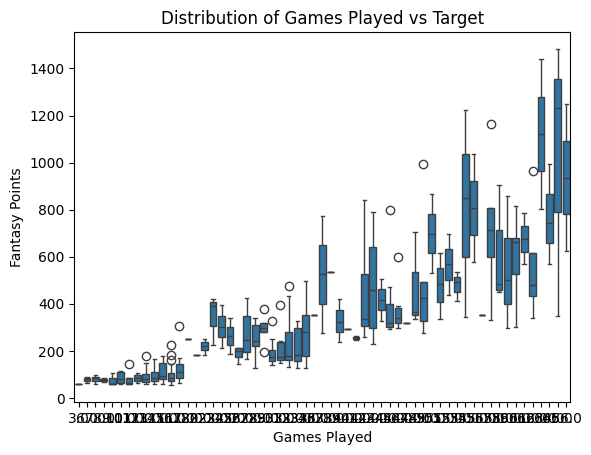

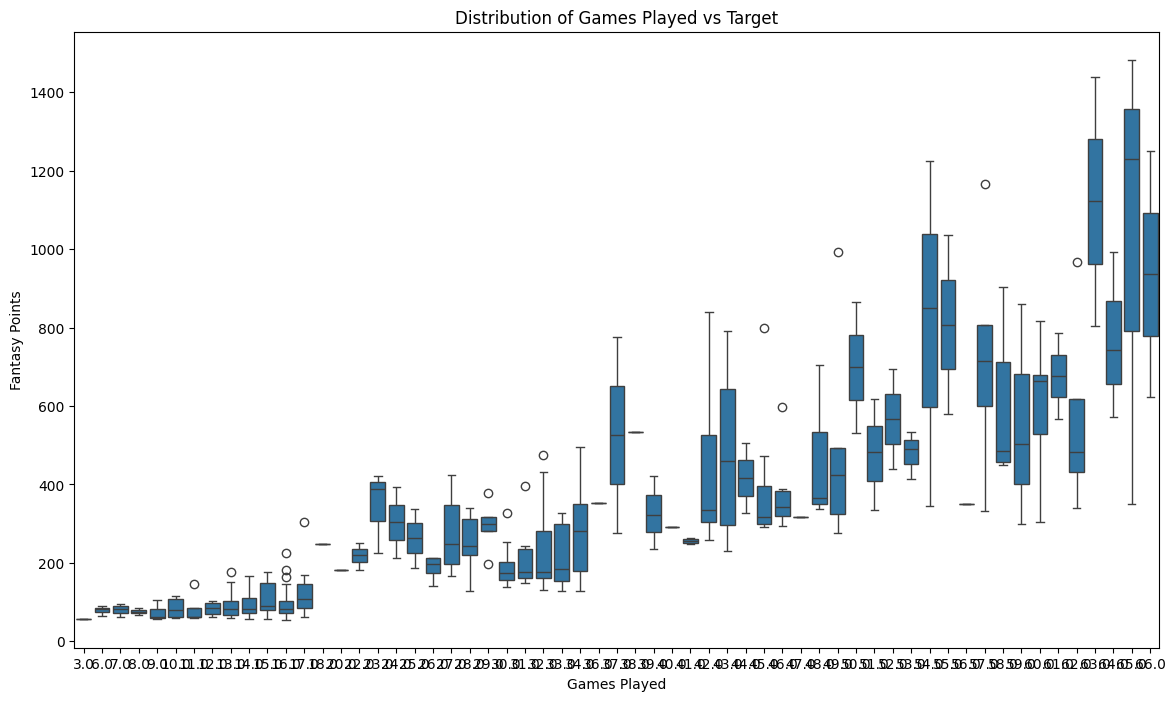

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 

# Split the temp set into validation and test sets
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 50% for validation, 50% for testing

# 2. Compute sample weights 
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# 3. Train the model with sample weights to address any imbalances
model.fit(X_train, y_train, sample_weight=sample_weights)

# 4. Make predictions and calculate RMSE for training, validation, and test sets
y_pred_train = model.predict(X_train)
train_rmse = np.sqrt(((y_train - y_pred_train) ** 2).mean())

y_pred_validation = model.predict(X_validation)
validation_rmse = np.sqrt(((y_validation - y_pred_validation) ** 2).mean())

y_pred_test = model.predict(X_test)
test_rmse = np.sqrt(((y_test - y_pred_test) ** 2).mean())

# 5. Print RMSE values for each dataset
print(f"Adjusted Training RMSE: {train_rmse}")
print(f"Adjusted Validation RMSE: {validation_rmse}")
print(f"Adjusted Test RMSE: {test_rmse}")

# 6. Visualizing the correlation of features with the target, if needed
# Plotting the correlation for 'Games Played' 
protected_columns = ['Games Played']  # Protected column

for col in protected_columns:
    if col in X_train.columns:
        correlation = X_train[col].corr(y_train)
        print(f"Correlation of {col} with target: {correlation}")

        # Optional visualization based on feature type (categorical vs. continuous)
        if 'Position' in col:
            sns.barplot(data=X_train, x=col, y=y_train)
            plt.title(f"Distribution of {col} vs Target")
        else:
            sns.boxplot(data=X_train, x=col, y=y_train)
            plt.title(f"Distribution of {col} vs Target")
        plt.show()

# Increase figure size
plt.figure(figsize=(14, 8))  
sns.boxplot(data=X_train, x='Games Played', y=y_train)
plt.title(f"Distribution of Games Played vs Target")
plt.show()

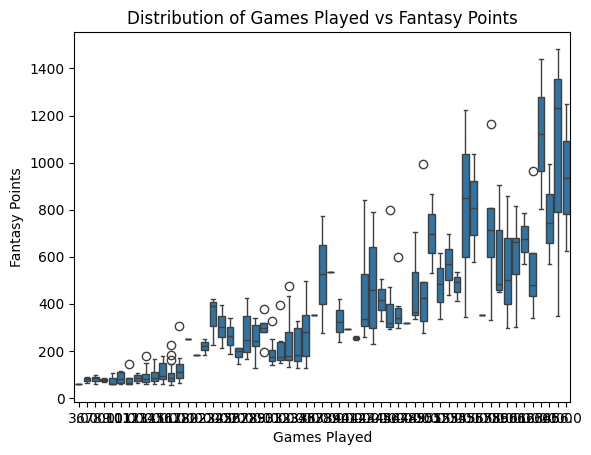

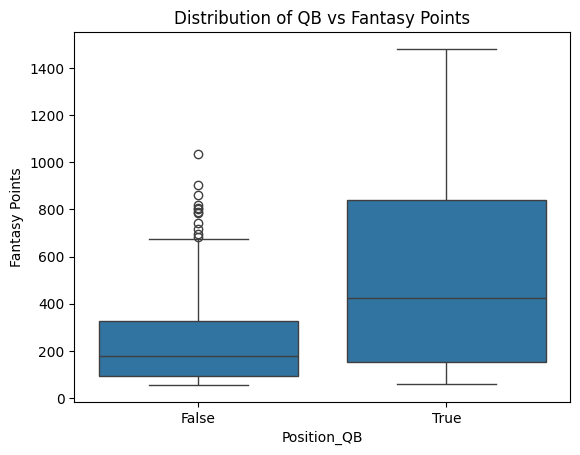

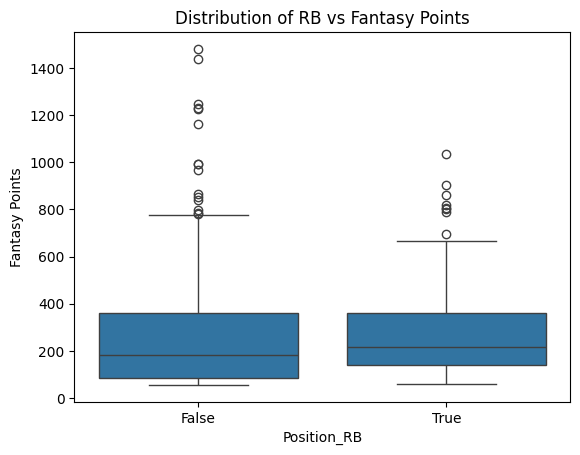

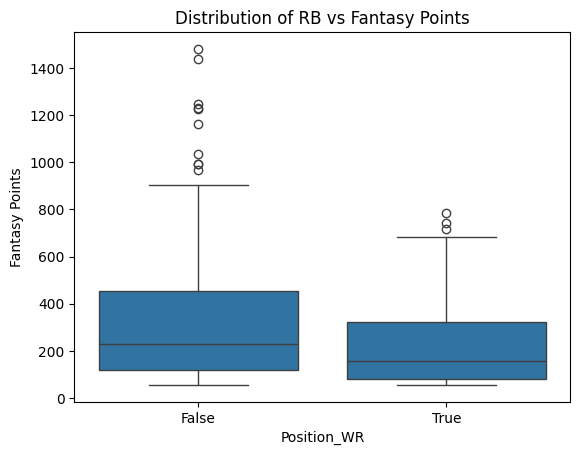

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing potential bias due to "Games Played"
sns.boxplot(x=X_train['Games Played'], y=y_train)
plt.title('Distribution of Games Played vs Fantasy Points')
plt.show()

# We can compare distributions for different positions (e.g., QB, RB, etc.)
sns.boxplot(data=X_train, x='Position_QB', y=y_train)
plt.title('Distribution of QB vs Fantasy Points')
plt.show()

sns.boxplot(data=X_train, x='Position_RB', y=y_train)
plt.title('Distribution of RB vs Fantasy Points')
plt.show()

sns.boxplot(data=X_train, x='Position_WR', y=y_train)
plt.title('Distribution of RB vs Fantasy Points')
plt.show()

In [63]:
# Games Played has a strong correlation with the target variable
# Let's simulate how changing this feature alters predictions:

# Select a random sample from X_test
sample_idx = random.choice(range(X_test.shape[0]))
sample = X_test.iloc[sample_idx]

# Get the original prediction for this sample
original_prediction = model.predict([sample])[0]

# Simulate a change in "Games Played" (e.g., increasing or decreasing by a fixed amount)
sample_with_changed_feature = sample.copy()
sample_with_changed_feature['Games Played'] = sample['Games Played'] + 2  # Adjust by 2 games

# Get the new prediction after the change
new_prediction = model.predict([sample_with_changed_feature])[0]

print(f"Original Prediction: {original_prediction}")
print(f"New Prediction after Changing 'Games Played': {new_prediction}")

Original Prediction: 96.95462036132812
New Prediction after Changing 'Games Played': 145.15536499023438


In [64]:
def analyze_bias_impact_on_stakeholders():
    bias_impact = {
        'Players': ("Players with fewer games played due to injuries may be unfairly penalized. "
                    "For example, a player like Christian McCaffrey, who has dealt with injuries in recent seasons, "
                    "might be undervalued in your model despite being one of the most productive players when healthy. "
                    "This could result in an inaccurate assessment of their true potential, leading to players being ranked lower "
                    "than they deserve."),
        
        'Teams': ("Fantasy teams might unintentionally avoid players with injury histories, skewing the player pool toward healthier, "
                  "more consistent players. For example, teams might pass on drafting a high-performing but injury-prone player, "
                  "thus reducing the diversity of player selection and creating an imbalance in the fantasy football ecosystem. "
                  "The model's reliance on games played could drive teams to avoid players who have missed games but could outperform "
                  "others if healthy."),
        
        'Stakeholders (General Impact)': ("Bias in the predictions could lead to issues in fairness, affecting player opportunities and rankings. "
                                         "For instance, players who have a history of injury might be unfairly ranked lower, leading to lower "
                                         "draft picks and fewer opportunities for players to showcase their talent. This could affect player morale "
                                         "and the marketability of their talent. Additionally, fantasy managers might base their decisions on these biased rankings, "
                                         "resulting in a distorted fantasy football environment where the best talent is not always recognized.")
    }

    print("Potential Bias Impact on Stakeholders:")
    for stakeholder, impact in bias_impact.items():
        print(f"{stakeholder}: {impact}")
        
    # Suggestions for Bias Removal:
    bias_removal_strategies = {
        'Games Played': ("Instead of using total games played as a primary feature, consider using performance per game or a player’s "
                         "performance when healthy as a more accurate reflection of their ability. For example, calculate average yards per game "
                         "or points per game rather than total yards or fantasy points, to minimize the penalization for missed games."),
        
        'Injury History Consideration': ("Incorporate an injury history variable that accounts for the number of games missed due to injuries, "
                                        "but combine it with performance data to ensure that a player’s health is not disproportionately affecting their ranking."),
        
        'Balanced Metrics': ("Use a balanced set of features that incorporate both performance and risk factors (e.g., games played, injury history) to ensure "
                             "that the model does not give undue weight to any single aspect of player performance.")
    }

    print("\nSuggestions for Bias Removal:")
    for feature, strategy in bias_removal_strategies.items():
        print(f"{feature}: {strategy}")

analyze_bias_impact_on_stakeholders()

Potential Bias Impact on Stakeholders:
Players: Players with fewer games played due to injuries may be unfairly penalized. For example, a player like Christian McCaffrey, who has dealt with injuries in recent seasons, might be undervalued in your model despite being one of the most productive players when healthy. This could result in an inaccurate assessment of their true potential, leading to players being ranked lower than they deserve.
Teams: Fantasy teams might unintentionally avoid players with injury histories, skewing the player pool toward healthier, more consistent players. For example, teams might pass on drafting a high-performing but injury-prone player, thus reducing the diversity of player selection and creating an imbalance in the fantasy football ecosystem. The model's reliance on games played could drive teams to avoid players who have missed games but could outperform others if healthy.
Stakeholders (General Impact): Bias in the predictions could lead to issues in fa

In [65]:
# --- Dependencies ---
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
import xgboost as xgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import random

In [66]:
# --- Split Data ---
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42) 
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# --- Compute Sample Weights ---
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# --- Train XGBoost Model ---
model.fit(X_train, y_train, sample_weight=sample_weights)

# --- Evaluate the Model ---
y_pred_train = model.predict(X_train)
train_rmse = np.sqrt(((y_train - y_pred_train) ** 2).mean())

y_pred_validation = model.predict(X_validation)
validation_rmse = np.sqrt(((y_validation - y_pred_validation) ** 2).mean())

y_pred_test = model.predict(X_test)
test_rmse = np.sqrt(((y_test - y_pred_test) ** 2).mean())

print(f"Training RMSE: {train_rmse}")
print(f"Validation RMSE: {validation_rmse}")
print(f"Test RMSE: {test_rmse}")

Training RMSE: 1.0294395912697911
Validation RMSE: 45.40649215085558
Test RMSE: 74.73240387925973


In [67]:
# --- Save the Model ---
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("Model saved as 'model.pkl'.")

# --- Load the Model for Deployment ---
with open('model.pkl', 'rb') as file:
    deployed_model = pickle.load(file)
print("Model successfully loaded for deployment.")

Model saved as 'model.pkl'.
Model successfully loaded for deployment.


In [68]:
# --- Simulating Data Drift ---
# Adding noise to features
drifted_X_test = X_test.copy()
drifted_X_test += np.random.normal(0, 0.5, drifted_X_test.shape)

# Predictions on drifted data
drifted_preds = deployed_model.predict(drifted_X_test)
drifted_rmse = np.sqrt(((y_test - drifted_preds) ** 2).mean())

print(f"RMSE on drifted test data: {drifted_rmse}")

RMSE on drifted test data: 61.27011978681095


In [69]:
# --- Simulating Concept Drift ---
# Example: Modify the relationship between 'Games Played' and the target
concept_drift_X_test = X_test.copy()
concept_drift_y_test = y_test.copy()

# For concept drift, redefine the target based on a new relationship
concept_drift_y_test = concept_drift_X_test['Games Played'] * 15 + np.random.normal(0, 1, len(concept_drift_X_test))

# Predictions on concept drifted data
concept_drift_preds = deployed_model.predict(concept_drift_X_test)
concept_drift_rmse = np.sqrt(((concept_drift_y_test - concept_drift_preds) ** 2).mean())

print(f"RMSE on concept drifted data: {concept_drift_rmse}")

RMSE on concept drifted data: 264.95682854360126


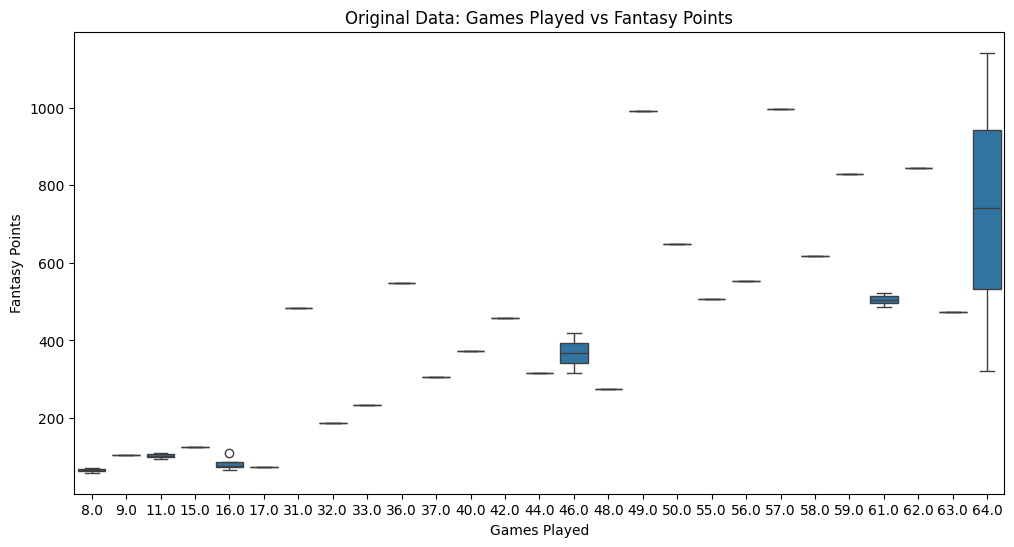

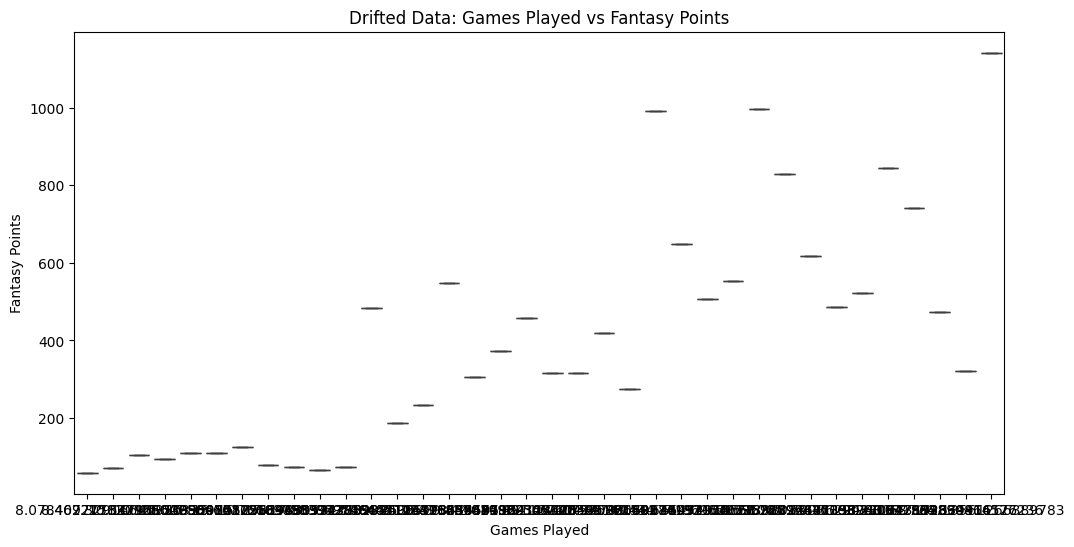

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [72]:
# --- Visualizing Effects of Feature Drift ---

# Original Data
plt.figure(figsize=(12, 6))  # Adjust width (12) and height (6) as needed
sns.boxplot(data=X_test, x='Games Played', y=y_test)
plt.title('Original Data: Games Played vs Fantasy Points')
plt.show()

# Drifted Data
plt.figure(figsize=(12, 6))  # Adjust width (12) and height (6) as needed
sns.boxplot(data=drifted_X_test, x='Games Played', y=y_test)
plt.title('Drifted Data: Games Played vs Fantasy Points')
plt.show()

In [71]:
'''
Model Monitoring Plan

1. **Monitor for Data Drift**:
   - Compare feature distributions between training and incoming data.
   - Use metrics like Jensen-Shannon Divergence or Kolmogorov-Smirnov Test.

2. **Monitor for Concept Drift**:
   - Track prediction errors over time (e.g., RMSE).
   - Investigate significant changes in feature importance rankings.

3. **Handling Drift**:
   - Retrain the model using a combination of historical and new data.
   - Deploy ensemble models that adapt to evolving data patterns.

4. **Visualization and Alerts**:
   - Build dashboards to display key performance metrics (e.g., RMSE, prediction distributions).
   - Set alerts to flag significant deviations in model behavior.
'''

'\nModel Monitoring Plan\n\n1. **Monitor for Data Drift**:\n   - Compare feature distributions between training and incoming data.\n   - Use metrics like Jensen-Shannon Divergence or Kolmogorov-Smirnov Test.\n\n2. **Monitor for Concept Drift**:\n   - Track prediction errors over time (e.g., RMSE).\n   - Investigate significant changes in feature importance rankings.\n\n3. **Handling Drift**:\n   - Retrain the model using a combination of historical and new data.\n   - Deploy ensemble models that adapt to evolving data patterns.\n\n4. **Visualization and Alerts**:\n   - Build dashboards to display key performance metrics (e.g., RMSE, prediction distributions).\n   - Set alerts to flag significant deviations in model behavior.\n'